# Feature extraction implementation

The following cell loads the paths. Use the paths file that you have been using for the rest of the project.

In [1]:
import os
# Paths, Make sure the elastix folder etc. is included in your current working directory
paths = open(os.getcwd() + r"\\paths.txt").read().splitlines()
ELASTIX_PATH, TRANSFORMIX_PATH, DATA_PATH ,OUTPUT_DIR, PARAM_DIR = paths

for path in paths:
    print(path,'\n')

C:\Users\20202310\Desktop\Vakken jaar 1\Capita selecta in medical image analysis\myfolder\elastix.exe 

C:\Users\20202310\Desktop\Vakken jaar 1\Capita selecta in medical image analysis\myfolder\transformix.exe 

C:\Users\20202310\Desktop\Vakken jaar 1\Capita selecta in medical image analysis\DevelopmentData 

C:\Users\20202310\PycharmProjects\8DM20_Capita_Selecta\results 

C:\Users\20202310\PycharmProjects\8DM20_Capita_Selecta\ParameterFiles 



## Initializing and running the class

The following cell creates a class instance for feature extraction.

In [2]:
from extractfeatures import extractfeatures

#Create class instance
obj = extractfeatures(DATA_PATH)

The following cell runs the functions necessary for feature extraction. (If this cell randomly prints a dictionary, don't mind it idk why it does this.)

In [3]:
heterogen = obj.calculate_heterogeneity()
svr = obj.calculate_svr()
volumes = obj.calculate_volume()
product_values, product_values_normalized = obj.calculate_product_values()

In [4]:
import csv

def write_dict_to_csv(dictionary, filename, metric_name):
    """
    Writes a dictionary to a JAMOVI-readable CSV file.
    
    Parameters:
        dictionary (dict): Dictionary with patient IDs as keys and metric values as values.
        filename (str): Name of the CSV file to be created.
        metric_name (str): Name of the column for the metric values.
    """
    with open(filename, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Patient ID", metric_name])  # Header row
        for patient_id, value in dictionary.items():
            writer.writerow([patient_id, value])
    
    print(f"File '{filename}' has been created.")

# Assuming you have already calculated the dictionaries:
# self.patient_svrs, self.patient_volumes, self.patient_heterogeneity

# Writing SVR to CSV
write_dict_to_csv(svr, "jamovi_patient_svr.csv", "SVR")

# Writing Volume to CSV
write_dict_to_csv(volumes, "jamovi_patient_volume.csv", "Volume (mm³)")

# Writing Heterogeneity to CSV
write_dict_to_csv(heterogen, "jamovi_patient_heterogeneity.csv", "Heterogeneity")


File 'jamovi_patient_svr.csv' has been created.
File 'jamovi_patient_volume.csv' has been created.
File 'jamovi_patient_heterogeneity.csv' has been created.


## Data visualisation

The following cell generates 3 2d plots of all extracted features against each other.

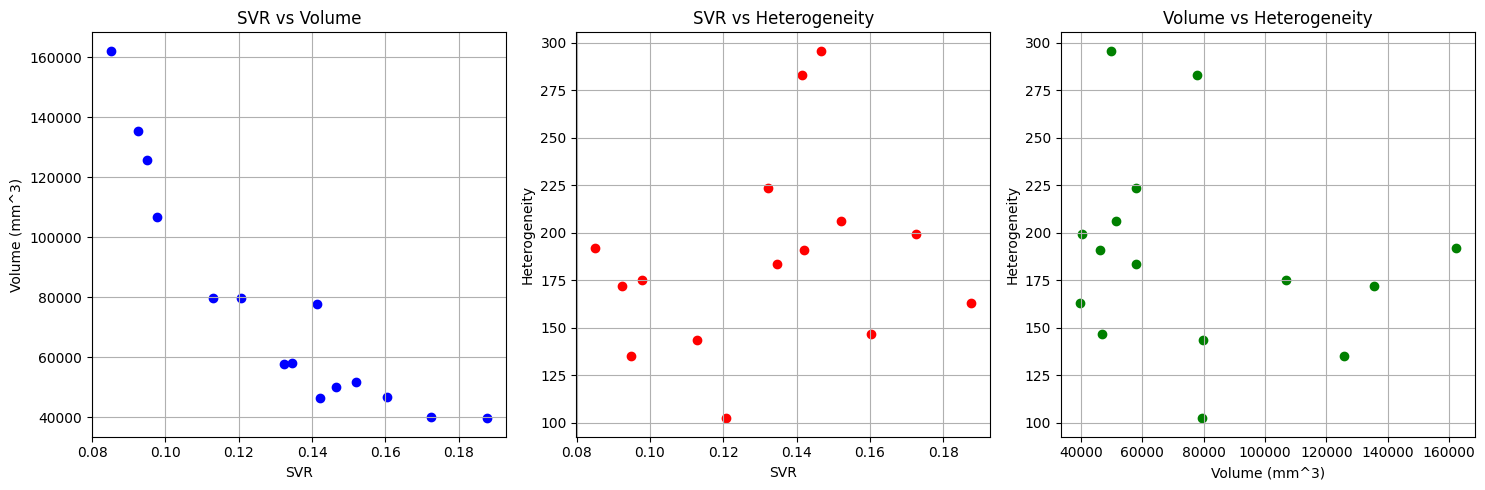

In [5]:
obj.generate_2d_plots()

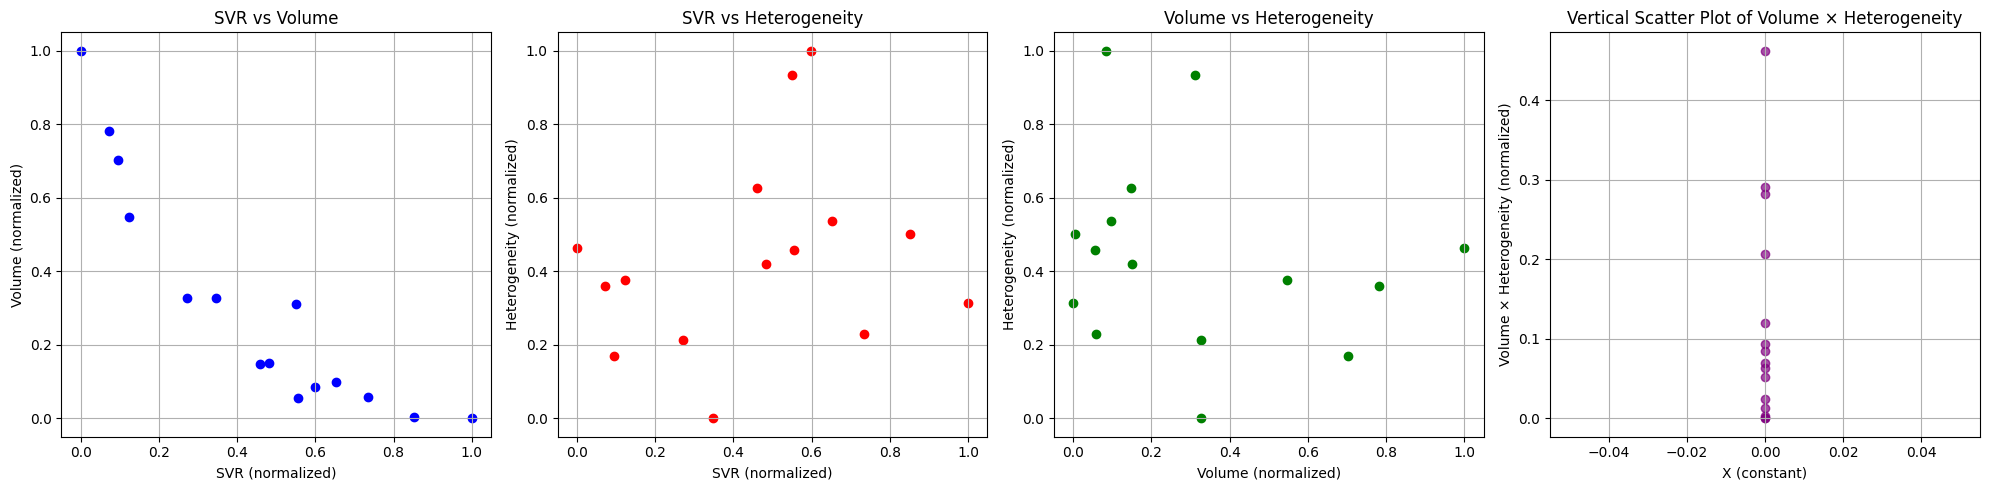

In [6]:
obj.generate_normalized_plots()

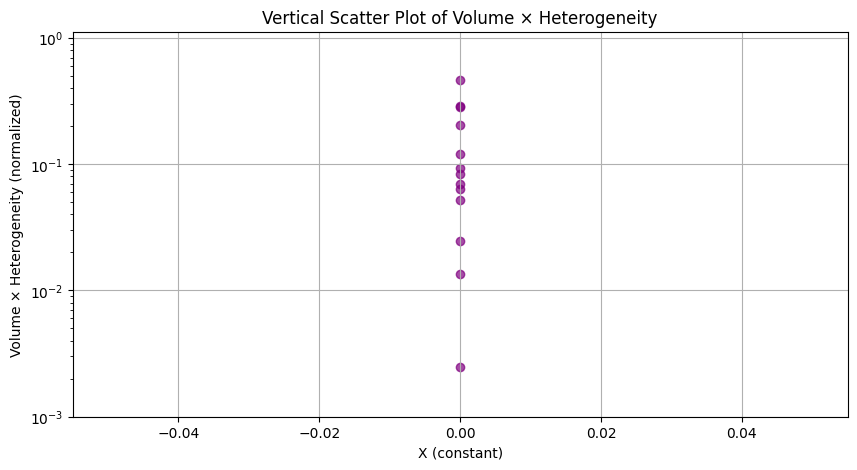

In [7]:
obj.generate_vertical_plot()

The following cell generates a 3d plot of all extracted features, do with it what you want haha.

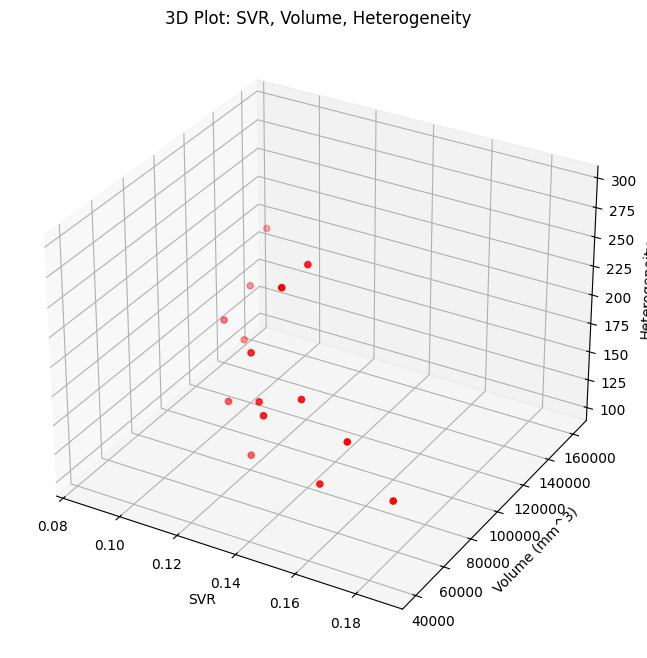

In [8]:
obj.generate_3d_plot()

## Percentile based division

The following cell divides all features based on percentile. 'Low' is represented by the lowest 25% of values of the selected features. 'Middle' is represented by the points between the lowest 25% and highest 75% of values of the selected features. 'High' is represented by the highest 75% of values of the selected features.

In [9]:
percentile_groups = obj.create_percentile_groups(lowerlimit=25, upperlimit=75)

The following cell prints the results and writes them to an output file

In [10]:
with open('percentile_groups_output.txt', 'w') as file:
    for category, groups in percentile_groups.items():
        print(f"\n{category} Percentile Groups:")
        file.write(f"\n{category} Percentile Groups:\n")
        for group, patients in groups.items():
            print(f"\n  {group.capitalize()} Percentile:")
            file.write(f"\n  {group.capitalize()} Percentile:\n")
            for patient_id, value in patients.items():
                print(f"    Patient {patient_id}: {value:.5f}")
                file.write(f"    Patient {patient_id}: {value:.5f}\n")

print("Output written to 'percentile_groups_output.txt' and printed to the console.")


SVR Percentile Groups:

  Low Percentile:
    Patient p129: 0.08512
    Patient p108: 0.09240
    Patient p116: 0.09493
    Patient p128: 0.09774

  Middle Percentile:
    Patient p120: 0.11288
    Patient p119: 0.12067
    Patient p133: 0.13226
    Patient p125: 0.13463
    Patient p109: 0.14147
    Patient p117: 0.14208
    Patient p127: 0.14663

  High Percentile:
    Patient p102: 0.15208
    Patient p107: 0.16040
    Patient p115: 0.17254
    Patient p135: 0.18771

Volume Percentile Groups:

  Low Percentile:
    Patient p135: 39653.45940
    Patient p115: 40253.55775
    Patient p117: 46300.55593
    Patient p107: 46883.48818

  Middle Percentile:
    Patient p127: 49998.42061
    Patient p102: 51601.54389
    Patient p133: 57838.79971
    Patient p125: 58133.72290
    Patient p109: 77803.69270
    Patient p119: 79605.65667
    Patient p120: 79758.95951

  High Percentile:
    Patient p128: 106687.56826
    Patient p116: 125817.99791
    Patient p108: 135523.52178
    Patient p1

In [15]:
import csv
import numpy as np

# Patient IDs list
patient_ids = ['p102', 'p107', 'p108', 'p109', 'p115', 'p116', 'p117', 'p119', 
               'p120', 'p125', 'p127', 'p128', 'p129', 'p133', 'p135']

# Patient data as a numpy array
data = np.array([
    [70.92249291, 30.43024811, 36.67424164, 49.2036584 , 38.53569774,
     31.68595904, 21.56385865, 37.01351105, 36.37306696, 42.76680956,
     24.43358345, 55.68662317, 43.28972164, 21.        , 39.7114593 ],
    [32.57299495,  2.        , 36.68787266, 35.44009029, 42.16633728,
     42.        , 24.77902339, 36.04164258, 30.61045573, 17.4642492 ,
     27.14774392, 50.05996404, 92.13576938, 29.42787794, 28.4956137 ],
    [37.8153408 , 39.2173431 , 12.24744871, 39.2173431 , 54.7813837 ,
     18.89444363, 54.12023651, 30.8058436 , 27.89265136, 44.37341546,
     46.91481642, 48.01041554, 23.02172887, 60.21627687, 36.95943723],
    [50.91168825, 38.54867053, 34.75629439,  1.73205081, 52.30678732,
     25.76819745, 53.41348144, 49.13247399, 32.90896534, 33.74907406,
     56.33826408, 47.18050445, 34.53983208, 47.08502947, 42.3792402 ],
    [38.4317577 , 27.01851217, 61.08191222, 42.87190222,  5.47722558,
     57.41950888, 26.72077843, 25.55386468, 34.19064199, 35.73513677,
     34.53983208, 54.82700065, 54.01851534, 40.79215611, 30.16620626],
    [32.21800739, 46.61544808, 19.10497317, 30.88689042, 37.97367509,
      5.47722558, 58.1893461 , 29.74894956, 24.91987159, 38.27531842,
     38.83297568, 34.2928564 , 19.87460691, 53.        , 32.57299495],
    [19.13112647, 23.87467277, 35.4682957 , 54.00925847, 31.78049716,
     50.        ,  7.        , 29.42787794, 32.93933818, 37.64306045,
     22.02271555, 70.25667228, 41.10960958, 23.04343724, 34.14674216],
    [30.14962686, 32.93933818, 51.96152423, 44.69899328, 32.71085447,
     27.92848009, 29.71531592,  7.28010989, 14.96662955, 35.62302626,
     37.49666652, 58.67708241, 34.02939905, 40.5092582 , 25.72936066],
    [35.80502758, 32.07802986, 21.        , 32.03123476, 36.91882988,
     21.42428529, 30.85449724, 14.96662955, 87.77812939, 24.        ,
     30.21588986, 36.30426972, 24.35159132, 39.40812099, 21.3541565 ],
    [34.53983208, 18.11077028, 42.81354926, 31.63858404, 35.52463934,
     41.70131892, 33.63034344, 38.78143886, 26.        ,  4.12310563,
     32.46536616, 34.05877273, 35.0142828 , 37.41657387, 40.02499219],
    [28.33725463, 21.77154106, 53.7494186 , 56.44466317, 37.90778284,
     58.12056435, 24.49489743, 36.95943723, 26.28687886, 62.65780079,
      3.        , 51.12729212, 43.46262762, 44.28317965, 28.3019434 ],
    [56.23166368, 57.49782605, 37.05401463, 51.64300533, 80.13738204,
     35.04283094, 81.98780397, 67.11184694, 39.05124838, 37.8153408 ,
     63.03967005,  2.82842712, 31.1608729 , 70.43436661, 56.6568619 ],
    [41.31585652, 46.57252409, 25.8069758 , 38.13135193, 50.33885179,
     20.51828453, 41.48493703, 41.44876355, 26.70205985, 43.92038251,
     41.86884283, 31.25699922,         np.inf, 56.62155067, 39.37003937],
    [22.6715681 , 34.95711659, 56.26721959, 48.13522619, 45.23273151,
     48.87739764, 23.93741841, 42.20189569, 44.06812907, 42.02380278,
     30.72458299, 69.36137254, 53.16013544,  6.        , 48.68264578],
    [37.90778284, 32.66496594, 35.41186242, 44.27188724, 34.71310992,
     35.56683849, 32.15587038, 25.07987241, 20.51828453, 40.17461885,
     28.91366459, 57.81003373, 37.88139385, 37.92097045, 78.1152994 ]
])

def write_mean_values_to_csv(data, patient_ids, filename):
    # Create a new array to store modified rows
    modified_data = []
    
    # Remove the n-th element from the n-th row
    for i in range(data.shape[0]):
        row = np.delete(data[i], i)  # Remove the i-th element from the i-th row
        modified_data.append(row)  # Append the modified row
    
    modified_data = np.array(modified_data)  # Convert back to numpy array after modification
    
    # Compute the mean of the modified rows
    means = np.nanmean(modified_data, axis=1)
    
    with open(filename, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Patient ID", "Mean Value"])
        for pid, mean_value in zip(patient_ids, means):
            writer.writerow([pid, mean_value])

    print(f"File '{filename}' has been created.")

# Write means to CSV
write_mean_values_to_csv(data, patient_ids, "jamovi_patient_hausdorff_means.csv")


File 'jamovi_patient_hausdorff_means.csv' has been created.
